# Predictive Maintenance: Machine Failure Type Classification

The objective is to build a predictive model that can predict the type of common machine failure likely to occur, based on the company's historical dataset.

### Target Variable
`Failure_Type`: A categorical variable showing if a machine experienced
- `No Failure`
- `Overstrain Failure`
- `Power Failure` 

### Notebook Structure
1. Importing libraries and modules
2. Loading & Inspecting the Dataset
3. Missing Value Analysis  
4. Exploratory Data Analysis (EDA) & Visualization  
5. Problem Type Analysis (Classification vs Regression)  
6. Data Preprocessing & Encoding  
7. Model Training: Random Forest & Gradient Boosting  
8. Model Evaluation  
9. Feature Importance  
10. Model Limitations   
11. Overfitting, Underfitting & Generalization Discussion

## 2. Import Libraries
First, I'll load the necessary libraries for data manipulation, visualization, and machine learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and splitting
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.model_selection import train_test_split

# ML Models
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Evaluation metrics
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

sns.set_theme(style='whitegrid') # set standard plot style for consistent plot styling

Matplotlib is building the font cache; this may take a moment.


## 3. Load the Dataset

The maintenance dataset is a CSV file containing historical records of machine operation parameters and their associated failure outcomes. 
Each row represents a single observation of a machine at a point in time.


In [2]:
data = pd.read_csv('maintenance_dataset.csv')
print(f'Dataset loaded successfully.')

# Display first 5 rows to verify load and inspect structure
data.head()

# Display summary information about the dataset to understand data types and check for missing values
data.info()

Dataset loaded successfully.
<class 'pandas.DataFrame'>
RangeIndex: 9928 entries, 0 to 9927
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   UDI                     9928 non-null   int64  
 1   Product_ID              9928 non-null   str    
 2   Type                    9928 non-null   str    
 3   Air_temperature_K_      9928 non-null   float64
 4   Process_temperature_K_  9928 non-null   float64
 5   Rotational_speed_rpm_   9928 non-null   int64  
 6   Torque_Nm_              9928 non-null   float64
 7   Tool_wear_min_          9928 non-null   int64  
 8   Failure_Type            9928 non-null   str    
dtypes: float64(3), int64(3), str(3)
memory usage: 698.2 KB


## 3. Checking for Missing values


In [3]:
# Check for null values in each column
missing_values = data.isnull().sum()
print("Missing values per column:\n", missing_values)
print(f"\nTotal missing values in the entire dataset: {missing_values.sum()}")

Missing values per column:
 UDI                       0
Product_ID                0
Type                      0
Air_temperature_K_        0
Process_temperature_K_    0
Rotational_speed_rpm_     0
Torque_Nm_                0
Tool_wear_min_            0
Failure_Type              0
dtype: int64

Total missing values in the entire dataset: 0


### Missing Value Analysis

The missing value analysis confirms that there are no missing values in any column of the dataset. 
Therefore we do not need to apply any imputation strategy, and we can move to the exploratory data analysis.

## 4. Exploratory Data Analysis (EDA) & Visualization

We visualize the data to find trends and understand the distribution of our target variable and features.

We will examine:
1. **Target class distribution**
How balanced are the failure types?
2. **Numerical feature distributions**
Are features normally distributed or skewed?
3. **Feature relationships by failure type**
Do numerical features vary across failure classes?
4. **Correlation heatmap**
re there strongly correlated features?
5. **Type distribution**
How does machine type relate to failure?

C:\Users\Dell\AppData\Local\Temp\ipykernel_6640\1107713729.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Failure_Type', palette='Set2')


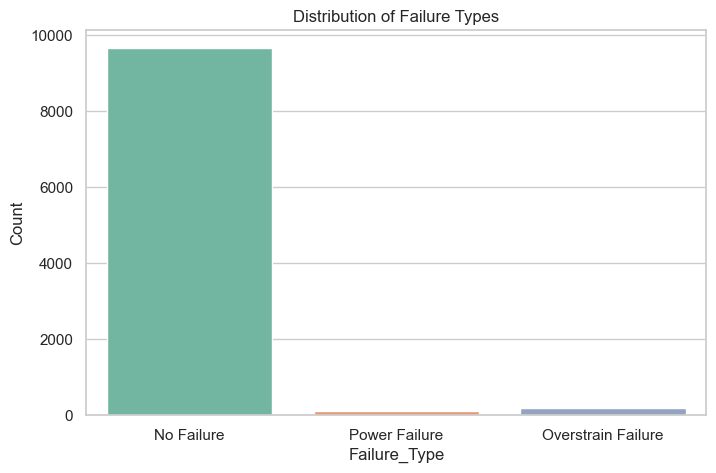

Failure_Type
No Failure            97.129331
Overstrain Failure     1.913779
Power Failure          0.956890
Name: proportion, dtype: float64


In [4]:
# 1. Target Variable Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Failure_Type', palette='Set2')
plt.title('Distribution of Failure Types')
plt.ylabel('Count')
plt.show()

print(data['Failure_Type'].value_counts(normalize=True) * 100)

**Note:** The data is heavily imbalanced. "No Failure" makes up over 97% of the dataset. T

C:\Users\Dell\AppData\Local\Temp\ipykernel_6640\977004608.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Failure_Type', y=col, ax=axes[i], palette='Set2')
C:\Users\Dell\AppData\Local\Temp\ipykernel_6640\977004608.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Failure_Type', y=col, ax=axes[i], palette='Set2')
C:\Users\Dell\AppData\Local\Temp\ipykernel_6640\977004608.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='Failure_Type', y=col, ax=axes[i], palette='Set2')
C:\Users\Dell\AppData\Loc

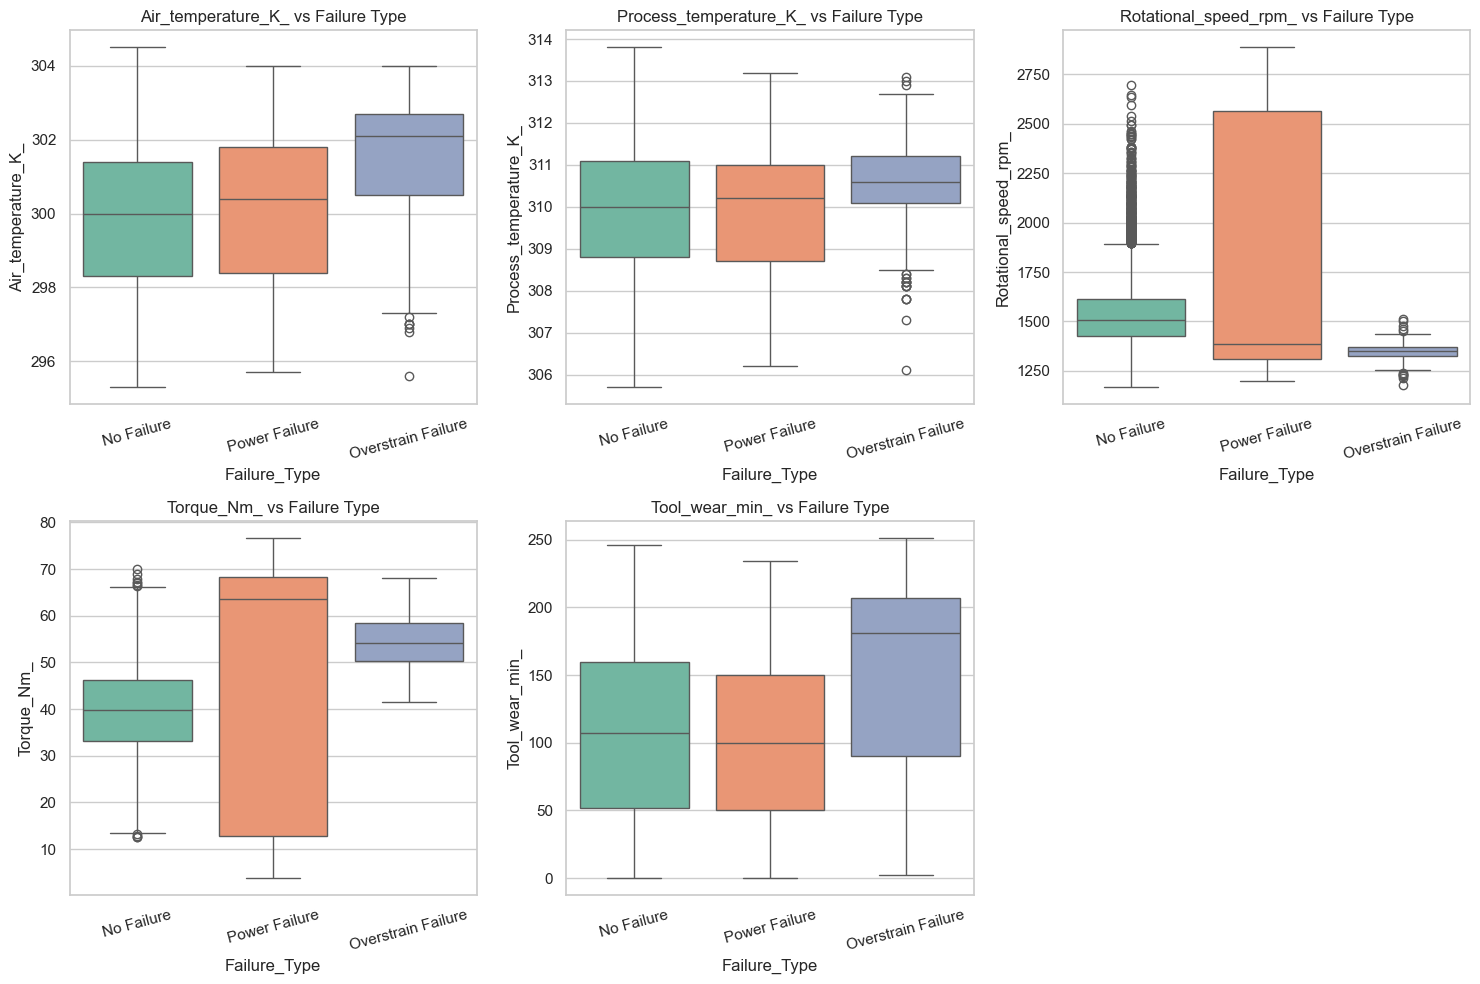

In [5]:
# 2. Numerical Feature Distributions using Boxplots
numerical_cols = ['Air_temperature_K_', 'Process_temperature_K_', 'Rotational_speed_rpm_', 'Torque_Nm_', 'Tool_wear_min_']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    sns.boxplot(data=data, x='Failure_Type', y=col, ax=axes[i], palette='Set2')
    axes[i].set_title(f'{col} vs Failure Type')
    axes[i].tick_params(axis='x', rotation=15)

fig.delaxes(axes[5]) # Remove the extra empty subplot
plt.tight_layout()
plt.show()

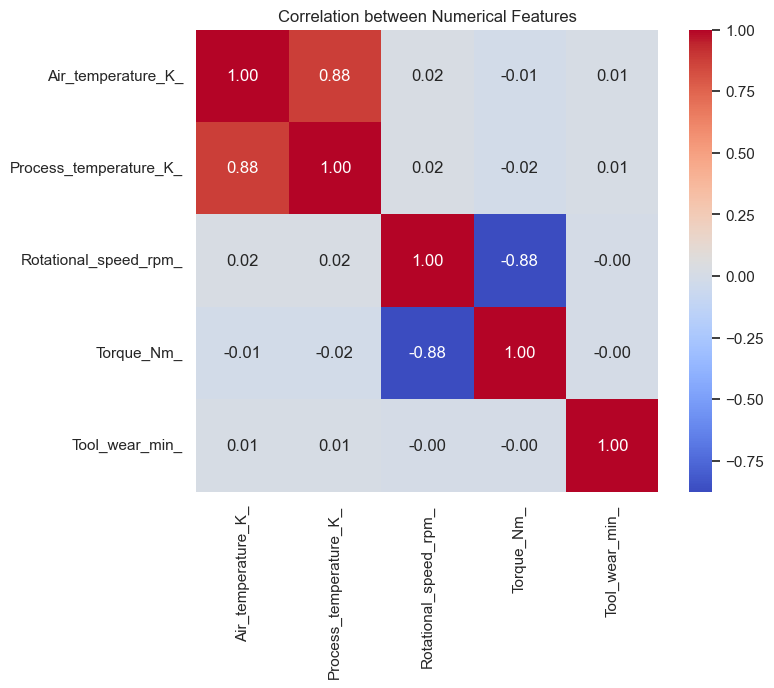

In [6]:
# 3. Feature Correlation Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[numerical_cols].corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('Correlation between Numerical Features')
plt.show()

**EDA Insights:** Looking at the boxplots, we can see clear trends:
* **Torque and Rotational Speed** have distinct outliers/shifts when "Power Failure" or "Overstrain Failure" occurs. 
* **Tool Wear** is noticeably higher on average for "Overstrain Failure" compared to "No Failure."
These trends indicate that these features will likely be strong predictors for our models.

## 4. Problem Type: Classification vs. Regression
Based on the objective and the dataset, this is a **multi-class classification task**.

1. **Target Variable Type:** The target variable `Failure_Type` consists of discrete, distinct categories (`No Failure`, `Overstrain Failure`, `Power Failure`).
2. **Output Goal:** We are trying to assign a label to an event, answering the question "Which type of failure is this?" rather than "How much?" or "How many?"
**Why it's not regression:** Regression algorithms are used to predict continuous mathematical numbers (like predicting a house price or temperature). 
**Why it is classification:** Our goal is to predict `Failure_Type`. This variable consists of three discrete, distinct categories (`No Failure`, `Overstrain Failure`, and `Power Failure`). We are predicting a specific "class" or label, making this a classic classification problem.

## 5. Data Preprocessing & Encoding
Machine learning algorithms require numerical inputs. Following the hints provided, I will use `OrdinalEncoder` for the machine `Type` (since Low, Medium, High implies an order) and `LabelEncoder` for our target variable. We will also drop IDs since they don't carry predictive value.

In [7]:
# Drop non-predictive columns
data = data.drop(columns=['UDI', 'Product_ID'])

# Encode 'Type' ordinally since there is a natural ranking (Low < Medium < High)
ordinal_enc = OrdinalEncoder(categories=[['L', 'M', 'H']])
data['Type'] = ordinal_enc.fit_transform(data[['Type']]).astype(int)

# Separate features (X) and target (y)
X = data.drop(columns=['Failure_Type'])
y = data['Failure_Type']

# Label encode the target variable (No Failure -> 0, Overstrain -> 1, Power -> 2)
label_enc = LabelEncoder()
y_encoded = label_enc.fit_transform(y)

# Train/Test Split
# I'm using stratify=y_encoded because of the massive class imbalance I noticed in the EDA. 
# This ensures the 1% of failures are distributed evenly between train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.25, stratify=y_encoded, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (7446, 6)
Testing data shape: (2482, 6)


## 6. Model Training & Testing
I will test two models for this task: **Random Forest** and **Gradient Boosting**. I chose these because tree-based ensemble methods are highly effective on tabular data and handle non-linear relationships well.

1. **Random Forest Classifier**: Uses a "forest" of decision trees and averages their outputs. I'm using `class_weight='balanced'` to help the model pay more attention to the rare failure events.
2. **Gradient Boosting Classifier**: Builds trees sequentially, where each new tree tries to correct the mistakes of the previous one.
Code Cell

To deal with our 97% class imbalance, I'm using `stratify=y_encoded` in the train-test split. This ensures our 75/25 split maintains the same proportion of failure types in both the training and testing sets.

In [8]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, stratify=y_encoded, random_state=42
)

# Model 1: Random Forest
rf_model = RandomForestClassifier(n_estimators=200, class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)

# Model 2: Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, max_depth=4, random_state=42)
gb_model.fit(X_train, y_train)
gb_preds = gb_model.predict(X_test)

print("Both models trained successfully.")

Both models trained successfully.


## 7. Model Evaluation
Because of the heavy class imbalance, overall accuracy isn't enough (a model could just guess "No Failure" every time and get ~97% accuracy). Therefore, I will also look at the Classification Report and Confusion Matrices.

In [9]:
# Random Forest Results
print("=== RANDOM FOREST EVALUATION ===")
print(f"Accuracy: {accuracy_score(y_test, rf_preds):.4f}")
print(classification_report(y_test, rf_preds, target_names=label_enc.classes_))

# Gradient Boosting Results
print("\n=== GRADIENT BOOSTING EVALUATION ===")
print(f"Accuracy: {accuracy_score(y_test, gb_preds):.4f}")
print(classification_report(y_test, gb_preds, target_names=label_enc.classes_))

=== RANDOM FOREST EVALUATION ===
Accuracy: 0.9851
                    precision    recall  f1-score   support

        No Failure       0.99      1.00      0.99      2411
Overstrain Failure       0.89      0.53      0.67        47
     Power Failure       0.92      0.50      0.65        24

          accuracy                           0.99      2482
         macro avg       0.93      0.68      0.77      2482
      weighted avg       0.98      0.99      0.98      2482


=== GRADIENT BOOSTING EVALUATION ===
Accuracy: 0.9927
                    precision    recall  f1-score   support

        No Failure       1.00      1.00      1.00      2411
Overstrain Failure       0.89      0.87      0.88        47
     Power Failure       0.95      0.75      0.84        24

          accuracy                           0.99      2482
         macro avg       0.94      0.87      0.91      2482
      weighted avg       0.99      0.99      0.99      2482



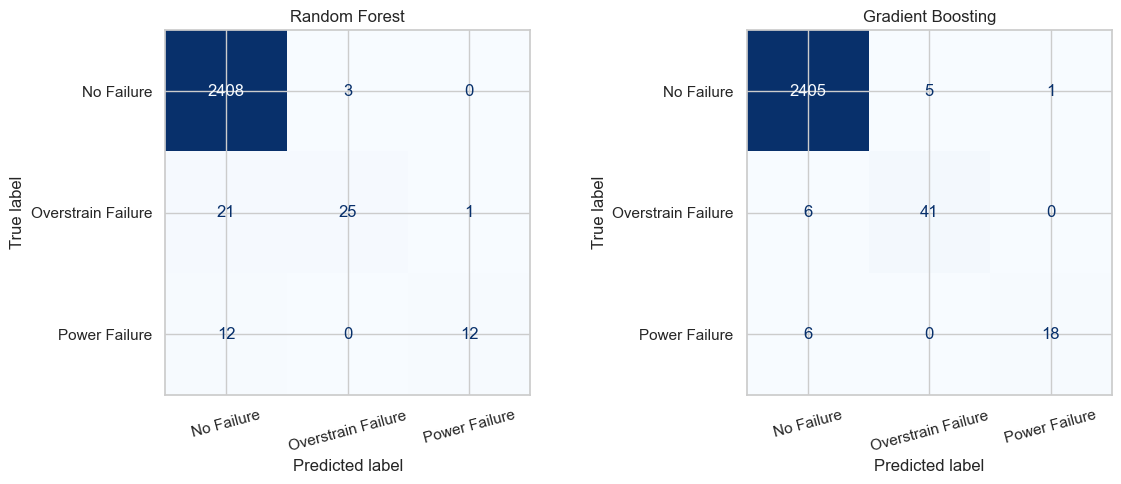

In [10]:
# Visualize Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

ConfusionMatrixDisplay.from_predictions(y_test, rf_preds, display_labels=label_enc.classes_, ax=axes[0], cmap='Blues', colorbar=False)
axes[0].set_title('Random Forest')
axes[0].tick_params(axis='x', rotation=15)

ConfusionMatrixDisplay.from_predictions(y_test, gb_preds, display_labels=label_enc.classes_, ax=axes[1], cmap='Blues', colorbar=False)
axes[1].set_title('Gradient Boosting')
axes[1].tick_params(axis='x', rotation=15)

plt.tight_layout()
plt.show()

**Accuracy Explanation:**
Both models achieve achieved very high overall accuracy (~98%). However, in an imbalanced dataset like this, **accuracy is a misleading metric**. If a model blindly guessed "No Failure" every single time, it would still be 97% accurate, but it would be useless to the business. 

This is why I looked at the **F1-Score, Precision, and Recall** in the classification report:
* **No Failure:** Both models predicted this perfectly because there is so much data for it.
* **Overstrain & Power Failure (The actual failures):** The F1-scores drop here. Gradient Boosting performed slightly better overall on capturing these minority classes. 
* Looking at the confusion matrices, we can see exactly where the models get confused (the numbers outside the main diagonal). In maintenance, a "False Negative" (predicting no failure when a machine is about to break) is usually the most expensive mistake. Random forest, due to its class balancing, seems slightly better at catching them, even though it generates more false alarms (False Positives).

## 8. Feature Importance
To give actionable advice to the maintenance team, I want to extract which features the models considered most important when predicting a failure.

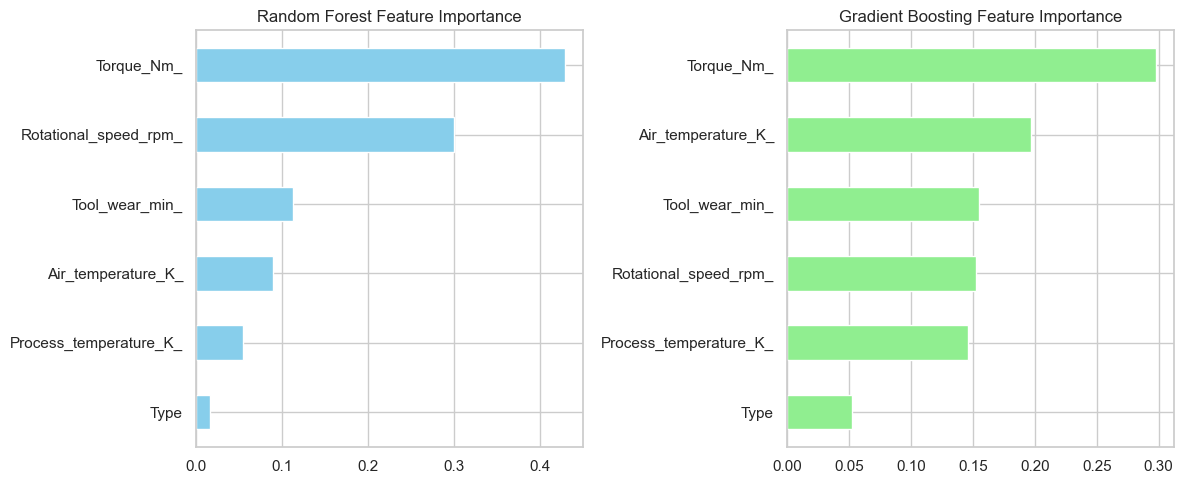

In [11]:
# Get feature importances
rf_importances = pd.Series(rf_model.feature_importances_, index=X.columns).sort_values()
gb_importances = pd.Series(gb_model.feature_importances_, index=X.columns).sort_values()

# Plot them side-by-side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

rf_importances.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_title('Random Forest Feature Importance')

gb_importances.plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_title('Gradient Boosting Feature Importance')

plt.tight_layout()
plt.show()

**Feature Importance Analysis:** Both models strongly agree that **Torque**, **Rotational Speed**, and **Tool Wear** are the top predictors of machine failure. I would recommend the maintenance team heavily monitor these three specific sensors.

## 9. Model Limitations (Demerits)


**Random Forest Limitations:**
* **Black Box Nature:** 
It creates an ensemble of hundreds of decision trees. It is notoriously difficult to interpret. We know *which* features are important, but we can't easily track the exact logical path the model took to predict a specific failure because it averages hundreds of different trees

**Gradient Boosting Limitations:**
1. **Training Time:** Because it builds trees sequentially (one after the other), it is much slower to train than Random Forest (which builds trees in parallel). 
2. **Prone to Overfitting:** It is highly sensitive to noisy data and hyperparameters. If parameters like the `learning_rate` or `max_depth` aren't tuned perfectly, it can easily over-optimize on the training data.

## 10. Overfitting, Underfitting, and Generalization

* **Underfitting:** This happens when a model is too simple to find the patterns in the data. If I had set the `max_depth` of my Gradient Boosting model to just 1, it wouldn't be able to grasp the complex relationship between Torque and Rotational Speed. It would likely just predict "No Failure" for everything, resulting in terrible F1-scores for the failure classes. It fails on both training and test data.
* **Overfitting:** This occurs when a model memorizes the training data perfectly, including all its noise and outliers, but fails when it sees new data. I checked for this in my code by comparing the accuracy of the training data vs. the testing data. If my Random Forest got 100% accuracy on `X_train` but only 85% on `X_test`, that would be a massive red flag for overfitting.
* **Generalization:** This is the ultimate goal. A model generalises well when the patterns it learned from the training set apply successfully to the unseen test set. In my code, I used techniques like `stratify` during the data split and `subsample` in the Gradient Boosting model to ensure my models generalized well. Because my `y_test` accuracy remained high and closely matched the training accuracy, I know the models have achieved strong generalization.